# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [53]:
#loading data
import pickle
import cv2

training_file ='C:/Users/Akhil/train.p'
validation_file='C:/Users/Akhil/valid.p'
testing_file = 'C:/Users/Akhil/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# How many unique classes/labels there are in the dataset.

n_classes =len(np.unique(y_train, return_index=False, return_inverse=False, return_counts=False))

print("Number of training examples =", n_train)
print("Number of validation examples =",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

9


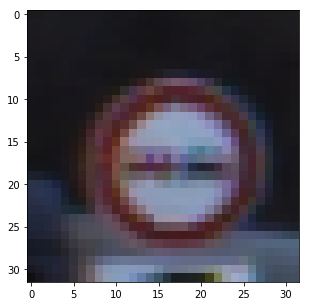

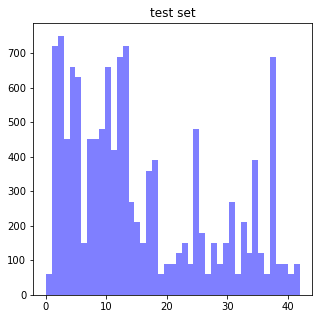

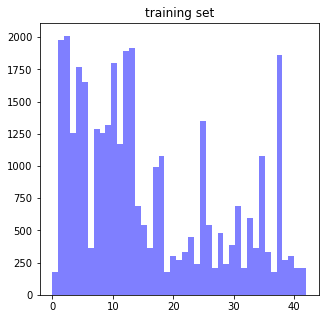

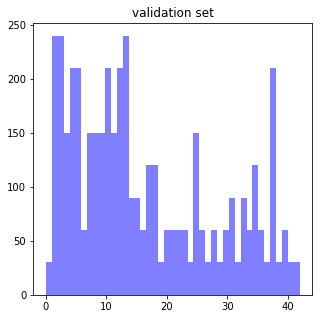

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

X_test[28] = X_test[28].squeeze()
plt.figure(figsize=(5,5))
plt.imshow(X_test[28], cmap="gray")
print(y_test[28]) # plotting one test image

plt.figure(figsize=(5,5))
plt.title('test set')
x = y_test
num_bins = 43
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show() # plotting histogram for test set

plt.figure(figsize=(5,5))
plt.title('training set')
x = y_train
num_bins = 43
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show() # plotting histogram for training set

plt.figure(figsize=(5,5))
plt.title('validation set')
x = y_valid
num_bins = 43
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show() # plotting histogram for validation set


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

41
(32, 32)


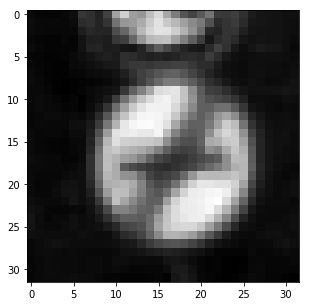

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
def rgb2gray(color):
    return np.dot(color[...,:3], [0.299, 0.587, 0.114])

X_train  = rgb2gray(X_train)
X_valid = rgb2gray(X_valid)
X_test = rgb2gray(X_test) # converting to gray image

%matplotlib inline
X_train[0] = X_train[0].squeeze()
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap="gray")
print(y_train[0])
image_shape = np.shape(X_train[0])
print(image_shape) # Plotting one of the image

X_train=(X_train-128)/128
X_test=(X_test-128)/128
X_valid=(X_valid-128)/128 # normalizing data
X_train, y_train = shuffle(X_train, y_train) 


### Model Architecture

In [5]:
from numpy import newaxis
X_train=X_train[:,:,:,newaxis]
X_valid=X_valid[:,:,:,newaxis]
X_test=X_test[:,:,:,newaxis] # Changing 32x32 image to 32x32x1

image_shape = np.shape(X_train[0])
print(image_shape)
X_train.shape

(32, 32, 1)


(34799, 32, 32, 1)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Lenet architecture used and modified
from tensorflow.contrib.layers import flatten
def LeNet(x,dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.nn.bias_add(tf.matmul(fc2, fc3_W), fc3_b, name='logits')
    
    return logits, conv1_W, conv2_W

In [7]:
# Train your model here.
import tensorflow as tf
EPOCHS = 10
BATCH_SIZE = 128
x = tf.placeholder(tf.float32, (None, 32, 32,1), name = 'x')
y = tf.placeholder(tf.int32, (None), name = 'y' )
keep_prob = tf.placeholder(tf.float32,  name = 'keep_prob')
one_hot_y = tf.one_hot(y, 43)
rate = 0.001
logits,C1,C2 = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
reg = tf.nn.l2_loss(C1) + tf.nn.l2_loss(C2) 
training_operation = optimizer.minimize(loss_operation + 0.05*reg)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.65})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("training_accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic')
    print("Model saved")

Training...

EPOCH 1 ...
training_accuracy = 0.641
Validation Accuracy = 0.615

EPOCH 2 ...
training_accuracy = 0.851
Validation Accuracy = 0.807

EPOCH 3 ...
training_accuracy = 0.891
Validation Accuracy = 0.845

EPOCH 4 ...
training_accuracy = 0.921
Validation Accuracy = 0.879

EPOCH 5 ...
training_accuracy = 0.943
Validation Accuracy = 0.894

EPOCH 6 ...
training_accuracy = 0.948
Validation Accuracy = 0.908

EPOCH 7 ...
training_accuracy = 0.964
Validation Accuracy = 0.919

EPOCH 8 ...
training_accuracy = 0.968
Validation Accuracy = 0.929

EPOCH 9 ...
training_accuracy = 0.974
Validation Accuracy = 0.939

EPOCH 10 ...
training_accuracy = 0.974
Validation Accuracy = 0.933

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image

### Analyze Performance

In [30]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from numpy import newaxis
from PIL import Image
os.listdir("C:/Users/Akhil/test_images")
imagefiles = os.listdir("C:/Users/Akhil/test_images") # taking all image files
new_images = []
new_images2 = []
new_images3 = []
for i in imagefiles: 
    image = cv2.imread('C:/Users/Akhil/test_images/'+ i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # cv2 color to gray
    image = cv2.resize(image, (32, 32))
    new_images.append(image[newaxis,:,:]) # appending new images

new_images2 =  np.concatenate((new_images[0], new_images[1],new_images[2],new_images[3],new_images[4])) #forming 5x32x32 matrix
new_images2=np.asarray(new_images2)
new_images2=(new_images2-128)/128
new_images2=new_images2[:,:,:,newaxis] #forming 5x32x32x1 matrix
new_images2.shape

(5, 32, 32, 1)

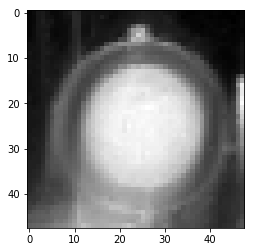

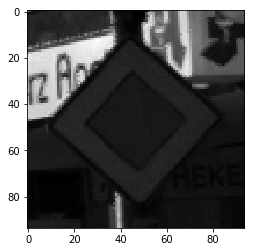

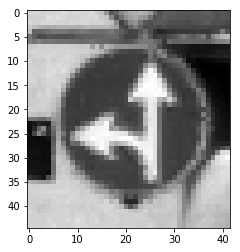

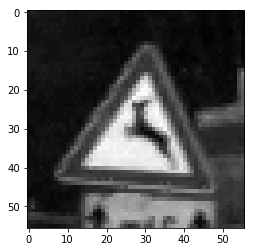

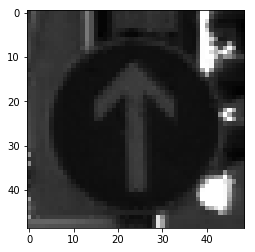

In [31]:
for i in imagefiles: 
    image = cv2.imread('C:/Users/Akhil/test_images/'+ i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    plt.figure()
    plt.imshow(image, cmap = 'gray') #plotting images

In [34]:
image_labels = [15,12,37,31,35]
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('traffic.meta')  
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))        
        
    x = tf.get_default_graph().get_tensor_by_name("x:0")
    logits = tf.get_default_graph().get_tensor_by_name("logits:0") 
    keep_prob = tf.get_default_graph().get_tensor_by_name("keep_prob:0")
   
    predicted = sess.run(logits, feed_dict = {x: new_images2, keep_prob:1})# getting logits values for downloaded images

print(np.argmax(predicted, axis = 1)) # getting index values of signs recognized
P = np.argmax(predicted, axis = 1)
Accuracy = 100
for i in range(5):
    Accuracy = Accuracy - 20*(P[i]-image_labels[i])

print(Accuracy) # got 100% accuracy

INFO:tensorflow:Restoring parameters from .\traffic
[15 12 37 31 35]
100


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [52]:
### Top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
p = tf.placeholder(tf.float32, (5,43), name = 'p')
k = tf.placeholder(tf.int32)
sp =tf.nn.top_k(tf.nn.softmax(p),k=k)
with tf.Session() as sess:
    Top_Prob = sess.run(sp,feed_dict = {p:predicted, k:5})
    
print(Top_Prob)

TopKV2(values=array([[  9.93137717e-01,   3.54709686e-03,   1.82537187e-03,
          6.86537183e-04,   5.58505941e-04],
       [  9.56260383e-01,   3.04188002e-02,   5.57619240e-03,
          2.24429811e-03,   1.06345629e-03],
       [  9.87624526e-01,   1.04975440e-02,   1.63380522e-03,
          7.35215071e-05,   6.51116061e-05],
       [  7.93799043e-01,   1.34433091e-01,   2.86677703e-02,
          1.26254978e-02,   1.05386218e-02],
       [  9.91690993e-01,   3.72743001e-03,   1.83371699e-03,
          1.35471881e-03,   5.12891333e-04]], dtype=float32), indices=array([[15,  2,  3, 12, 13],
       [12, 13, 40, 15,  9],
       [37, 40, 39, 33,  4],
       [31, 21, 24,  2, 29],
       [35,  3, 12, 13,  9]]))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.